In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [23]:
from tensorflow.keras import backend as K
from tensorflow.keras import backend
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import regularizers
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing import image_dataset_from_directory

from IPython.display import display # Library to help view images
from PIL import Image # Library to help view images
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Library for data augmentation
from tensorflow.keras.preprocessing import image
import os, shutil # Library for navigating files
np.random.seed(1)

In [3]:
# Download and innsall Kaggle package
! pip install kaggle -q

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"haydennguyen39","key":"23a6edf484da4593e35eea8cb12d2c63"}'}

In [3]:
# Make a Kaggle dirrectory
! mkdir ~/.kaggle

In [4]:
# Copy kaggle.json file to the newly creadted Kaggle folder
! cp kaggle.json ~/.kaggle/

In [5]:
# Change permission of the the ,json file.
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
# Download the fruits dataset
! kaggle datasets download -d moltean/fruits

 99% 1.28G/1.28G [00:17<00:00, 128MB/s]
100% 1.28G/1.28G [00:17<00:00, 77.1MB/s]


In [7]:
# Unzip the dataset
! unzip fruits.zip

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/111_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/112_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/113_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/114_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/115_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/116_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/117_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/119_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/120_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/121_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/122_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/123_100.jpg  
  inflating: fruits-360_dataset/fruits-360/

In [8]:
# create directory for data folders
base_dir = '/content/fruits-360_dataset/fruits-360/'
train_dir = os.path.join(base_dir, 'Training')
test_dir = os.path.join(base_dir, 'Test')


In [9]:
class_folders = os.listdir(train_dir)

In [10]:
# have a look on classes
class_folders

['Apple Golden 2',
 'Pear Red',
 'Peach',
 'Mango Red',
 'Cauliflower',
 'Beetroot',
 'Pear Monster',
 'Mandarine',
 'Kohlrabi',
 'Apple Red 1',
 'Tomato 1',
 'Nectarine Flat',
 'Papaya',
 'Apple Pink Lady',
 'Guava',
 'Pear Kaiser',
 'Huckleberry',
 'Clementine',
 'Kiwi',
 'Tomato Cherry Red',
 'Mulberry',
 'Pear 2',
 'Banana Lady Finger',
 'Grape Pink',
 'Cantaloupe 2',
 'Tomato Maroon',
 'Pepper Green',
 'Passion Fruit',
 'Corn',
 'Melon Piel de Sapo',
 'Cactus fruit',
 'Kumquats',
 'Chestnut',
 'Cherry 1',
 'Peach 2',
 'Pepper Orange',
 'Tomato 4',
 'Physalis with Husk',
 'Corn Husk',
 'Hazelnut',
 'Lemon',
 'Cherry Wax Black',
 'Apple Golden 3',
 'Cherry Wax Yellow',
 'Potato Red',
 'Pomegranate',
 'Grape Blue',
 'Redcurrant',
 'Cherry 2',
 'Tangelo',
 'Apricot',
 'Limes',
 'Apple Red 3',
 'Apple Golden 1',
 'Grapefruit Pink',
 'Onion Red Peeled',
 'Apple Granny Smith',
 'Blueberry',
 'Pear',
 'Pineapple',
 'Strawberry Wedge',
 'Pear Stone',
 'Potato White',
 'Apple Red Delicious'

###Do some EDA on the dataset

In [11]:
import pandas as pd
train_fruits_name = []
train_fruits_image_file = []
for i in os.listdir(train_dir):
    for train_image_filename in os.listdir(train_dir+'/'+i):
        train_fruits_name.append(i)
        train_fruits_image_file.append(train_image_filename)
# Create a dataframe of train image data:
train_fruits_df=pd.DataFrame(train_fruits_name,columns=["fruits name"])
train_fruits_df["fruits image"]=train_fruits_image_file

train_fruits_df.head()

,fruits name,fruits image
0,Apple Golden 2,172_100.jpg
1,Apple Golden 2,193_100.jpg
2,Apple Golden 2,r_20_100.jpg
3,Apple Golden 2,138_100.jpg
4,Apple Golden 2,182_100.jpg


In [12]:
# Count the number of each class
fruit_count=train_fruits_df["fruits name"].value_counts().reset_index()
fruit_count = fruit_count.rename(columns={"index": "fruits name", "fruits name": "count"})
fruit_count

,fruits name,count
0,Grape Blue,984
1,Plum 3,900
2,Peach 2,738
3,Cherry Rainier,738
4,Cherry 2,738
...,...,...
126,Cucumber Ripe,392
127,Tomato Maroon,367
128,Pear Kaiser,300
129,Mangostan,300


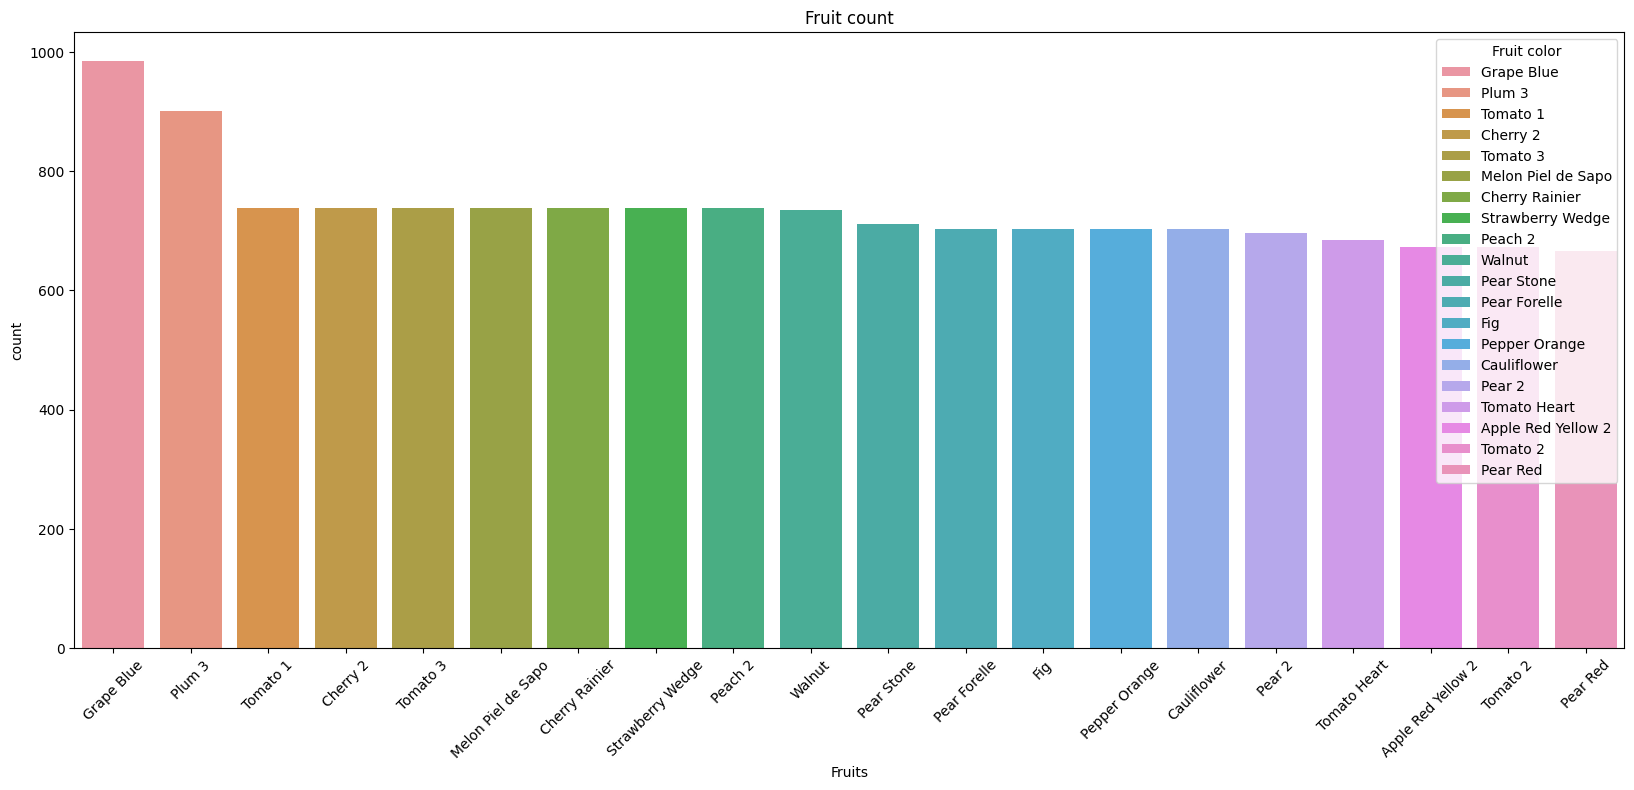

In [31]:
import seaborn as sns
# Plot the top 20 fruits
top20_fruit= fruit_count[:20]

fig, ax = plt.subplots(figsize=(20, 8))
ax = sns.barplot(x='fruits name', y='count', data=top20_fruit, hue='fruits name', dodge=False)
ax.set_ylabel('count')
ax.set_xlabel('Fruits')
ax.set_xticklabels(rotation=45,labels = top20_fruit['fruits name'])
ax.set_title('Fruit count')
ax.legend(title='Fruit color')

plt.show()

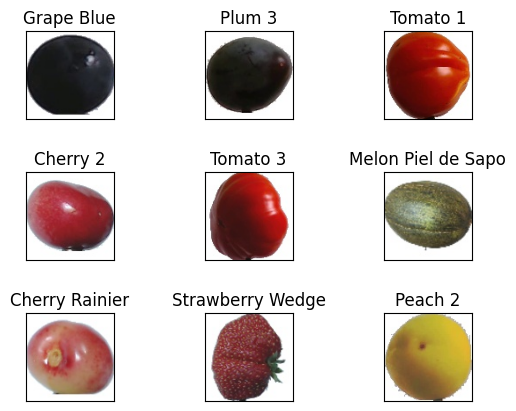

In [39]:
# Have a look at some fruit images
fig, axes = plt.subplots(3, 3)
fig.subplots_adjust(hspace=0.6, wspace=0.3)

for i, ax in enumerate(axes.flat):
  ax.set_xticks([])
  ax.set_yticks([])
  ax.set_title(fruit_count["fruits name"][i])
  all_files = os.listdir(train_dir + '/'+ fruit_count["fruits name"][i])
  first_image_name = all_files[0]
  ax.imshow(image.load_img(train_dir + '/'+fruit_count["fruits name"][i]+"/"+first_image_name))


### Preparation for model training
Normalization the data:

In [13]:
train_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2) #Split training data into 'trainin' and 'validation' sets
test_datagen = ImageDataGenerator(rescale=1./255)

In [14]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150), # All images will be resized to 150x150
    batch_size=32, # We will take images in batches of 32.
    class_mode='categorical', subset = 'training') # 'training' dataset is splitted from 'Training' folder
val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150), # All images will be resized to 150x150
    batch_size=32,
    class_mode='categorical', subset = 'validation') # 'validation' dataset is splitted from 'Training' folder
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical')

Found 54190 images belonging to 131 classes.
Found 13502 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


In [15]:
# Build a model
def Base_CNN():
  backend.clear_session()
  model = models.Sequential()

  model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (150, 150, 3)))
  model.add(layers.MaxPool2D((2,2)))
  model.add(BatchNormalization())

  model.add(layers.Conv2D(32, (3,3), activation = 'relu'))
  model.add(layers.MaxPool2D((2,2)))
  model.add(BatchNormalization())

  model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
  model.add(layers.MaxPool2D((2,2)))
  model.add(BatchNormalization())

  model.add(layers.Flatten())
  model.add(layers.Dense(1024, activation='relu'))
  model.add(layers.Dropout(0.5))

  model.add(layers.Dense(131, activation='softmax'))

  model.compile(optimizer = 'rmsprop',
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])
  return model

In [17]:
# Build a plotting function
def plot_history():
  history_dict = history.history
  loss_values = history_dict['loss']
  val_loss_values = history_dict['val_loss']
  acc_values = history_dict['accuracy']
  val_acc_values = history_dict['val_accuracy']
  epochs = range(1, len(history_dict['accuracy']) + 1)

  plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
  plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
  plt.title('Training and validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

  plt.plot(epochs, acc_values, 'bo', label = 'Training accuracy')
  plt.plot(epochs, val_acc_values, 'b', label = 'Validation accuracy')
  plt.title('Training and validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  return plt.show()

In [25]:
model = Base_CNN()

**Model 1:** Base CNN model with Convolution, Max pooling, Batch Normalization, and Drop out techiniques:

Epoch 1/15
100/100 [==============================] - 151s 1s/step - loss: 7.3553 - accuracy: 0.2819 - val_loss: 9.1453 - val_accuracy: 0.0088
Epoch 2/15
100/100 [==============================] - 143s 1s/step - loss: 2.6413 - accuracy: 0.5491 - val_loss: 16.1391 - val_accuracy: 0.0037
Epoch 3/15
100/100 [==============================] - 157s 2s/step - loss: 1.7023 - accuracy: 0.7106 - val_loss: 10.3034 - val_accuracy: 0.0613
Epoch 4/15
100/100 [==============================] - 155s 2s/step - loss: 1.2814 - accuracy: 0.7803 - val_loss: 12.6000 - val_accuracy: 0.0669
Epoch 5/15
100/100 [==============================] - 146s 1s/step - loss: 1.0757 - accuracy: 0.8150 - val_loss: 6.3127 - val_accuracy: 0.3350
Epoch 6/15
100/100 [==============================] - 159s 2s/step - loss: 0.9526 - accuracy: 0.8444 - val_loss: 1.9278 - val_accuracy: 0.6931
Epoch 7/15
100/100 [==============================] - 156s 2s/step - loss: 0.7544 - accuracy: 0.8828 - val_loss: 0.9962 - val_accuracy: 0.8

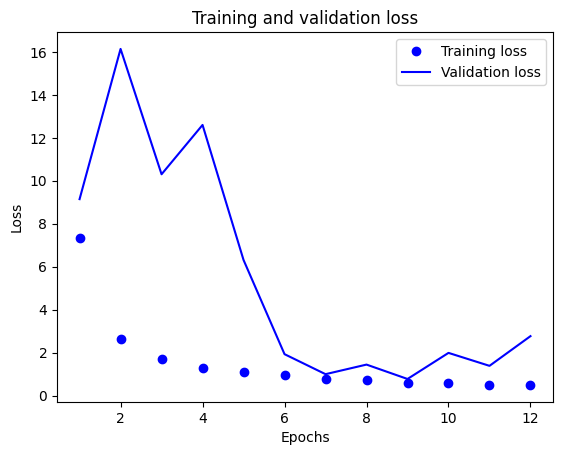

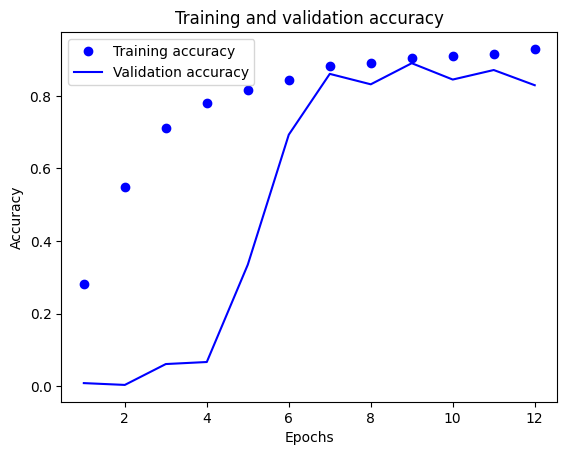

50/50 [==============================] - 17s 327ms/step - loss: 1.1966 - accuracy: 0.8487
test_acc: 0.8487499952316284


In [27]:
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=15,
    validation_data=val_generator,
    validation_steps=50,
    verbose = 1,
    callbacks=[EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights = True)])

plot_history()

test_loss, test_acc =model.evaluate(test_generator, steps = 50)
print('test_acc:', test_acc)

The accuracy score seems pretty good. Let's try Data Augmentation to see if the figure can be improved more.

**Model 2:** Apply Data Augmentation

In [19]:
train_datagen2 = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)
test_datagen2 = ImageDataGenerator(rescale=1./255)

In [20]:
train_generator2 = train_datagen2.flow_from_directory(
    train_dir,
    target_size=(150, 150), # All images will be resized to 150x150
    batch_size=32, # We will take images in batches of 32.
    class_mode='categorical', subset = 'training')
val_generator2 = train_datagen2.flow_from_directory(
    train_dir,
    target_size=(150, 150), # All images will be resized to 150x150
    batch_size=32,
    class_mode='categorical', subset = 'validation')
test_generator2 = test_datagen2.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical')

Found 54190 images belonging to 131 classes.
Found 13502 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


Epoch 1/15
100/100 [==============================] - 188s 2s/step - loss: 5.9354 - accuracy: 0.3091 - val_loss: 5.3315 - val_accuracy: 0.2756
Epoch 2/15
100/100 [==============================] - 195s 2s/step - loss: 3.3042 - accuracy: 0.4050 - val_loss: 2.8246 - val_accuracy: 0.4538
Epoch 3/15
100/100 [==============================] - 192s 2s/step - loss: 2.6626 - accuracy: 0.4653 - val_loss: 2.7841 - val_accuracy: 0.3931
Epoch 4/15
100/100 [==============================] - 164s 2s/step - loss: 2.1697 - accuracy: 0.5172 - val_loss: 1.5597 - val_accuracy: 0.6137
Epoch 5/15
100/100 [==============================] - 201s 2s/step - loss: 1.9998 - accuracy: 0.5572 - val_loss: 1.6657 - val_accuracy: 0.6531
Epoch 6/15
100/100 [==============================] - 209s 2s/step - loss: 1.7701 - accuracy: 0.5906 - val_loss: 2.0019 - val_accuracy: 0.6187
Epoch 7/15
100/100 [==============================] - 179s 2s/step - loss: 1.5447 - accuracy: 0.6237 - val_loss: 1.0044 - val_accuracy: 0.7469

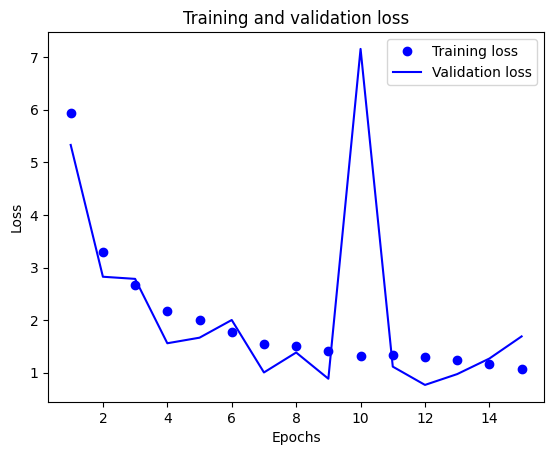

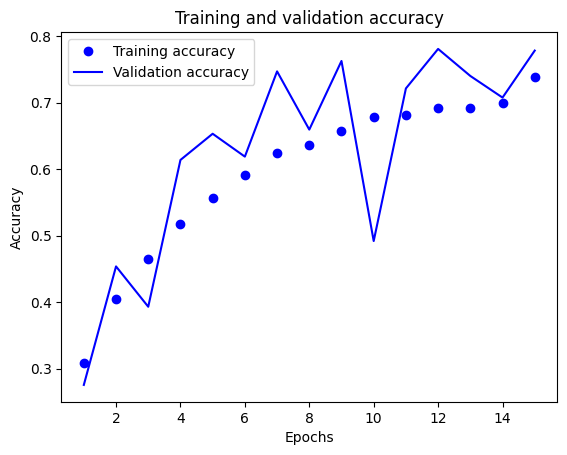

50/50 [==============================] - 15s 306ms/step - loss: 0.6564 - accuracy: 0.8475
test_acc: 0.8475000262260437


In [21]:
history = model.fit(
    train_generator2,
    steps_per_epoch=100,
    epochs=15, # Train data for 15 epochs
    validation_data=val_generator2,
    validation_steps=50,
    verbose = 1,
    callbacks=[EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights = True)])
plot_history()

test_loss, test_acc =model.evaluate(test_generator2, steps = 50)
print('test_acc:', test_acc)

Epoch 1/25
100/100 [==============================] - 189s 2s/step - loss: 1.1993 - accuracy: 0.7019 - val_loss: 1.0219 - val_accuracy: 0.7731
Epoch 2/25
100/100 [==============================] - 182s 2s/step - loss: 1.1411 - accuracy: 0.7172 - val_loss: 1.0603 - val_accuracy: 0.7400
Epoch 3/25
100/100 [==============================] - 179s 2s/step - loss: 1.1028 - accuracy: 0.7291 - val_loss: 1.7094 - val_accuracy: 0.7056
Epoch 4/25
100/100 [==============================] - 184s 2s/step - loss: 1.0649 - accuracy: 0.7412 - val_loss: 2.0906 - val_accuracy: 0.7156


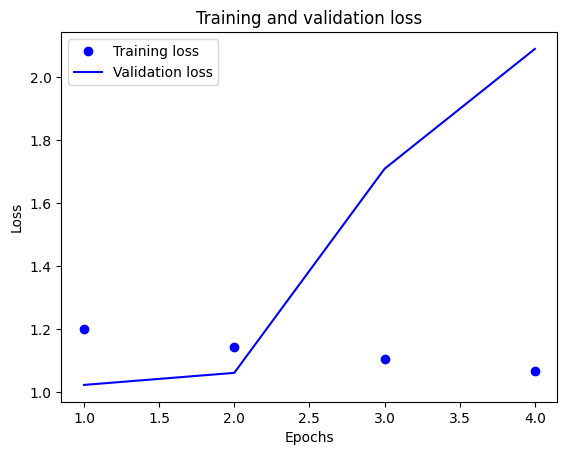

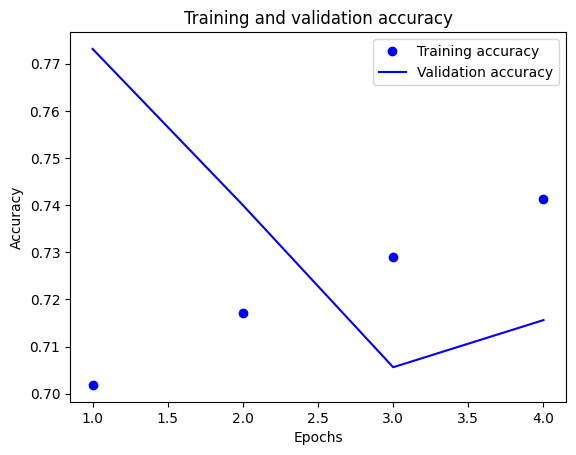

50/50 [==============================] - 18s 343ms/step - loss: 0.6342 - accuracy: 0.8763
test_acc: 0.8762500286102295


In [22]:
# Increase number of epochs:
history = model.fit(
    train_generator2,
    steps_per_epoch=100,
    epochs=25, # Train data for 25 epochs
    validation_data=val_generator2,
    validation_steps=50,
    verbose = 1,
    callbacks=[EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights = True)])
plot_history()

test_loss, test_acc =model.evaluate(test_generator2, steps = 50)
print('test_acc:', test_acc)

# Project Write-Up
## Overview of Assignment
This assignment is working on the fruits dataset with 90380 images of 131 fruits and vegetables. The purpose of the project is to address the classification task which will train a model that can classify input image data according to given 131 classes.
## Description of data
The dataset consists of 3 folders of fruits and vegetable images: Training, Test, test_multiple_fruit.
The images in the 3rd folders are images with combination or mixes of many types of fruits while the images in Training and Test folders are one fruit or vegetable in each image. So, this assignment only focus on dataset in the 2 folders 'Traing', and 'Test'.
<li>The total number of images: 90483.
<li>
Training set size: 67692 images (one fruit or vegetable per image).
<li>
Test set size: 22688 images (one fruit or vegetable per image).
<li>
The number of classes: 131 (fruits and vegetables).
<li>Image size: 100x100 pixels </li>

## Summary of methods
Firstly, in the preprocessing step, the dataset was normalized. The 'Training' dataset was used to train the model and splitted into 'training set' and 'validation' set with 80:20 ratio.
Then, 3 models were built to address the multiclass classification task.
## Summary of model
The base CNN model consisted of 3 convolutional layers, two with 32 filters and one with 64 filters. I also added MaxPooling, and BatchNormalization layers for each convolution layers. This model was fit with normalized dataset and performed 85% accuracy. <br>
Next, I applied Data Augementation techniques into the Normalization step to see the improvement. In addition, I increased the number of epochs from 15 to 25.</br>
## Analysis of results
The base model performed pretty well and the data augementation technique hasn't contributed significantly. However, the accuracy score was improved from 85% to 87,6%.

## Conclusion and potential future work
This project to classify fruits and vegetable can benefit in many fields such as health care, retails, etc. For example, these kinds of classification model can help a supermarket cashier quickly scan and recognize type of fruits that benefit for a quick check-out. <br> The potential high accuracy score may be contributed by the hard work of building and collecting data about fruits and vegetables.</br>
Some of future work could be explored in an effort to improve the model:
<li> Explore more options of factors such as number of epochs, epochs steps, etc. or other ways of data augementation to optimize model performance.
<li> Try other pretrained model such as xception, ResNet, etc.
